# [확률과 통계] 파이썬으로 정규 분포 그리기

1. 정규 분포란
- 정규 분포(Normal distribution)은 통계학에서 연속 확률분포의 한 종류로서 데이터의 분포를 근사하는데 가장 흔하게 사용됨.
- 가우스 분포라고도 함.
- 정규 분포의 모양은 2개의 매개변수(parameter)인 평균 $ \mu $과 표준편차$ \sigma $에 의해 결정되며, 이때의 분포를 N($ \mu $, $ \sigma $)로 나타냅니다.
- N($ \mu $, $ \sigma $)를 갖는 확률 변수 X는 기대값, 최빈값, 중앙값이 모두 $ \mu $이면, 분산은 $ \sigma^2 $로 주어집니다. 
- 정규 분포 N($ \mu $, $ \sigma $)를 갖는 확률 변수 X에 대한 확률밀도함수(probaility Density Function, PDF)는 아래와 같이 주어집니다.
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} exp \left[ 
    - \frac{(x-\mu)^2}{e\sigma^2} \right] $$

- 정규 분포 N($ \mu $, $ \sigma $)의 학률 밀도 함수에 대한 누적 분포 함수 (cumulative Distribution Funtion, CDF)는 아래와 같이 주어집니다.
$$  \phi (x |  \mu  ,  \sigma^2   )  = \frac{1}{2}  \left [ 1+  +erf \left ( \frac{(x-\mu)}{\sqrt{2\sigma ^2}} \right)  \right ]  $$

## 2. 정규 분포 그리기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

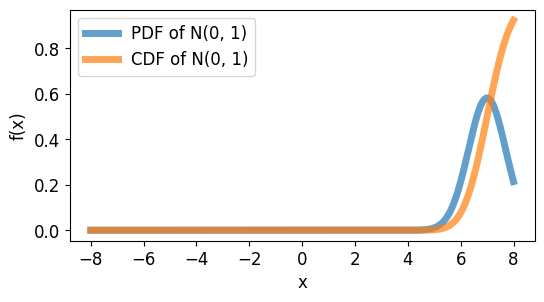

In [3]:
np.random .seed(0)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 5

# mu = 0.0
# sigma = 1.0
mu = 7.0
sigma = 0.7

x = np.linspace(-8, 8, 1000)
y = (1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2)/(2*sigma**2))
y_cum = 0.5 * (1 + erf((x-mu) / (np.sqrt(2*sigma**2))))

plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
plt.plot(x, y_cum, alpha=0.7, label='CDF of N(0, 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.show()

In [39]:
np.random .seed(0)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 5

data = [(1.0, 1.0), (1.5, 1.5), (3.0, 2.0)  ] # 하나는 평균이고 하나는 sigma(표준편차)
# 이것을 하나씩 꺼내어 파일로 저장함. 
x = np.linspace(-8, 8, 1000)

for idx, i in enumerate(data):
    y = (1 / np.sqrt(2*np.pi*i[1]**2) * np.exp(-(x-i[0])**2)/(2*i[1]**2))
    plt.plot(x, y, alpha=0.7, label='mer: ' + str(i[0])+', '+'sigma: '+str(i[1]))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(loc='upper left')
    plt.savefig('savefig' + str(idx) + '.png')
    plt.clf()

<Figure size 600x300 with 0 Axes>

In [47]:
np.random .seed(0)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 5

# 하나는 평균이고 하나는 sigma(표준편차)
data = [(np.random.randint(1,10), np.random.rand()*10) for _ in range(50)]
x = np.linspace(-8, 8, 1000)

for idx, data in enumerate(data):
    i, j = data
    y = (1 / np.sqrt(2*np.pi*j**2) * np.exp(-(x-i)**2)/(2*j**2))
    plt.plot(x, y, alpha=0.7, label=f'CDF of N({i, j})')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(loc='upper left')
    plt.savefig('savefig' + str(idx) + '.png')
    plt.clf()

<Figure size 600x300 with 0 Axes>

In [48]:
def der_f(f_, x_, h=0.0000001):
    return (f_(x_ + 2*h) - f_(x_ - 2*h) / (2*h))